In [1]:
from torchvision.datasets import EMNIST, ImageFolder
from torchvision.transforms import ToTensor

In [2]:
emnist_train = EMNIST(root="./datasets/", split="balanced", train=True, transform=ToTensor())
emnist_test = EMNIST(root="./datasets/", split="balanced", train=False, transform=ToTensor())

In [3]:
dida = ImageFolder(root="./datasets/DIDA", transform=ToTensor())

In [4]:
cardis = ImageFolder(root="./datasets/CARDIS", transform=ToTensor())

(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.   

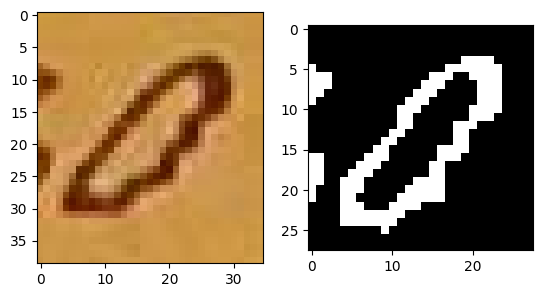

In [102]:
import transforms as ts
import matplotlib.pyplot as plt
from importlib import reload
reload(ts)

fig, (ax1, ax2) = plt.subplots(1, 2)

img = dida.__getitem__(15)[0].squeeze().numpy().transpose(1, 2, 0)
ax1.imshow(img, interpolation='nearest', cmap='grey')

img = ts.emnist_transform(img)
print(img[0])
ax2.imshow(img[0][0].squeeze(), interpolation='nearest', cmap='grey')

plt.show()